In [28]:
from_msvc = False
is_single_output = False

coefficients = {
    "lambda": 0,
    "R": 2,
    "mu": 1,
    "kappa": 3,
    "xi": 4,
    "gamma": 5,
    "gammaC": 6,
    "vel": 7,
    "tau": 8,
}

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

if from_msvc:
    root_folder_type = "Debug"
    root_folder_compiler = "Intel"
    root_folder = "D:\\vs\\source\\repos\\SymPhas\\examples\\simultaneous-configs\\out\\build\\x64-{}-{}\\{}{}".format(
        root_folder_compiler,
        root_folder_type,
        "" if root_folder_compiler == "Intel" else root_folder_type + "\\",
        "simulations",
    )

    # output_name = "cellular-migration-jamming"
    output_name = "model-b"
else:
    root_folder = "data"
    output_name = "equilibration"

root_path = Path(root_folder, output_name)
print(root_path.resolve())

root_folder_name_2 = "D:\\vs\\source\\repos\\SymPhas\\examples\\simultaneous-configs\\simulations\\model-b\\"
folder_time_2 = "2023.10.22.09.54.50\\1"

root_folder_name_1 = "C:\\Users\\Zirconix\\Dropbox\\steven\\"
folder_time_1 = "2023.10.15.13.17.49"
# folder_time_1 = "2023.09.06.21.03.09"
# folder_time_1 = "2023.09.06.21.02.45"

# folder_time_0 = "tracking_" + folder_time_1
# folder_time_0 = "2023.09.20.17.05.15"
folder_time_0 = "2023.10.21.15.11.16\\0"

data_folder_name = "data"
checkpoint_folder_name = "checkpoint"
tracking_data_file_name = "abs-data-output_0.txt"
field_data_file_name = "data_{index}_{step:09d}.txt"


## dealing with equilibration folder:
folder_time_2 = "2024.04.07.19.06.15"


E:\Dropbox\research\papers\cellular_migration\data\equilibration


In [89]:

data = [None, None]
for i, index in enumerate([0, 144]):

    #file_name = root_folder_name_0 + folder_time_0 + data_folder_name + field_data_file_name
    file_path = root_path / folder_time_2 / data_folder_name / field_data_file_name.format(index=index, step=1600000)
    #file_name = root_folder_name_2 + folder_time_2 + data_folder_name + field_data_file_name

    if file_path.exists():
        data_raw = np.loadtxt(file_path)
        frame_starts, = np.where(data_raw[:,0] == 0)

        if (len(frame_starts) > 1):
            delta = frame_starts[1] - frame_starts[0]
        else:
            delta = len(data_raw)
        frames = frame_starts.size

        x = data_raw[0, 1:]
        y = data_raw[1:delta, 0]
        X, Y = np.meshgrid(x, y)

        picked_frame = 0
        data[i] = data_raw[(picked_frame) * delta + 1:(picked_frame + 1) * delta, 1:]
        
    else:
        print(f"phase-field data is not available under {file_path.resolve()}")


In [90]:

file_path = root_path / folder_time_0 / data_folder_name / tracking_data_file_name
if file_path.exists():
    data_raw = np.loadtxt(file_path)
    if (len(data_raw) > 0):
        sort_info = np.array([(t, n) for t, n in data_raw[:,[0,3]]], dtype=[('t', float), ('n', int)]).argsort(order=('n', 't'))
        data_points = np.array([(n, [x, y]) for (_, x, y, n) in data_raw[sort_info]], dtype=[('index', float), ('pos', float, 2)])
        points = np.split(data_points['pos'], np.unique(data_points['index'], return_index=True)[1][1:])
    else:
        points = []
else:
    print(f"tracking data is not available under {root_path / folder_time_0}")


tracking data is not available under data\equilibration\2023.10.21.15.11.16\0


In [91]:
# read a checkpoint

checkpoint_index = 1600000
max_cols = 160

#checkpoint_name = root_folder_name_1 + folder_time_1 + "\\checkpoint\\" + "data" + str(checkpoint_index)
#checkpoint_name = root_folder_name_0 + folder_time_0 + "\\checkpoint\\" + "data" + str(checkpoint_index)
checkpoint_name = root_path / folder_time_2 / "checkpoint" / f"data{0}_{checkpoint_index}"
print(checkpoint_name.resolve())
data_checkpoint = np.array(pd.read_csv(checkpoint_name, sep=' ', names=[str(i) for i in range(0, max_cols)], engine='python').values, dtype=float)


E:\Dropbox\research\papers\cellular_migration\data\equilibration\2024.04.07.19.06.15\checkpoint\data0_1600000


In [92]:
picked_time = 0

current_time = 0
next_line = 0
while next_line < len(data_checkpoint):
    checkpoint_header=data_checkpoint[next_line,:]
    checkpoint_info = checkpoint_header[~np.isnan(checkpoint_header)]
    s0, s1 = checkpoint_info[1:3]
    n0, n1 = checkpoint_info[4:8:2]
    h0, h1 = n0 / s0, n1 / s1
    
    x0, x1, y0, y1 = checkpoint_info[-4:].astype('float')
    rows = int((y1 - y0) / h1) + 1
    cols = int((x1 - x0) / h0) + 1
    print(rows, cols)
    if next_line > 0:
        current_time = checkpoint_info[0]
    else:
        current_time = checkpoint_info[7]
        
    #print(current_time)
    
    if current_time >= picked_time:
        print(f"origin at {x0:.2f}, {y0:.2f}, time={current_time}")
        checkpoint = data_checkpoint[next_line + 1:next_line + 1 + int(rows),:]
        checkpoint = checkpoint[~np.isnan(checkpoint)]
        checkpoint = checkpoint.reshape([int(rows), int(cols)])
        break
    else:
        next_line += rows + 1

151 126
origin at 740.00, 712.00, time=1600000.0


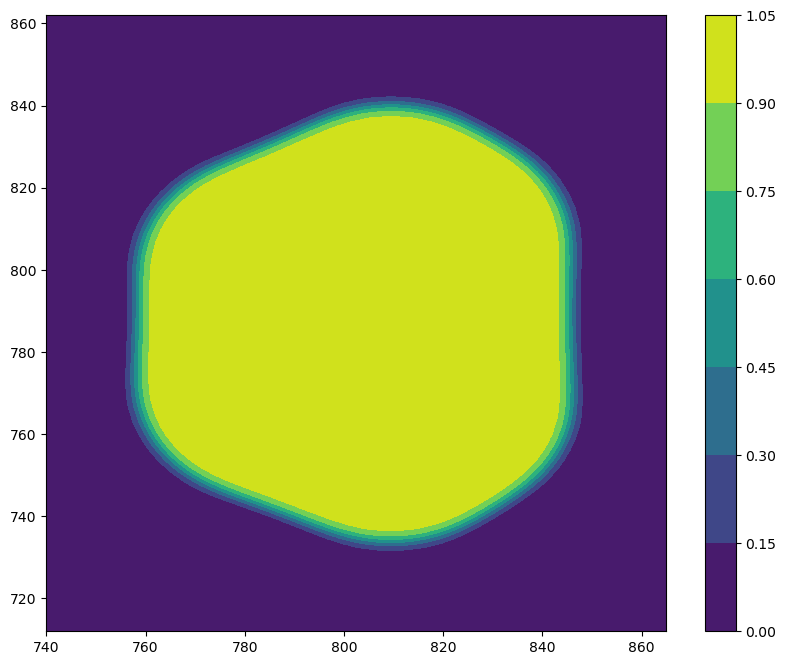

In [93]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlim([x0, x1])
ax.set_ylim([y0, y1])
extent=[x0, x1, y0, y1]
cs = ax.contourf(checkpoint, extent=extent)
cbar = fig.colorbar(cs)


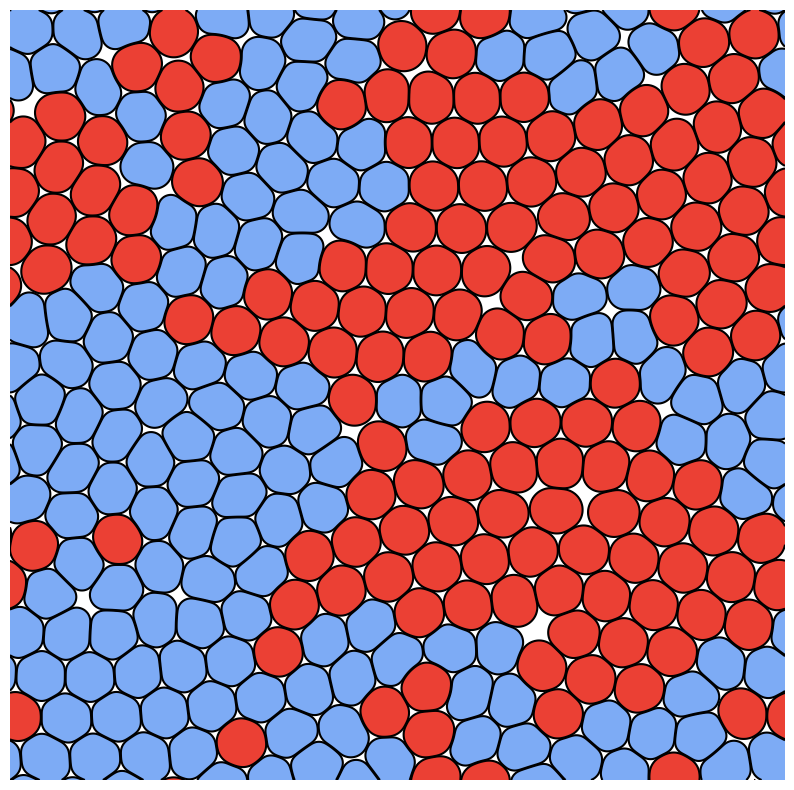

In [94]:
x = np.linspace(0, s0)
y = np.linspace(0, s1)

X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim([x[0], x[-1]])
ax.set_ylim([y[0], y[-1]])
#problem in cell 127 of 03.15

cell_color = ["#7dabf5", "#eb4034"]
levels=[0.25, 2]
extent=[x[0], x[-1], y[0], y[-1]]

for d, c in zip(data, cell_color):
    # d, c = list(zip(data, cell_color))[0]
    im0 = ax.contourf(d, extent=extent, colors=[c], levels=levels)
    im1 = ax.contour(d, extent=extent, colors=["black"], levels=levels)
    
ax.axis('off')

# for p in points[55:56]:
#     xp, yp = zip(*p)
    #ax.scatter(xp[0:1] % delta, yp[0:1] % delta)
        #np.max([x0 for x0 in [xp[picked_frame]]]) % 1600, \
        #np.max([y0 for y0 in [yp[picked_frame]]]) % 1600)

fig.savefig('plot_cells.svg', format='svg', bbox_inches='tight')
fig.savefig('plot_cells.png', format='png', bbox_inches='tight')


In [95]:
vels = np.zeros(len(points), dtype=(float, (len(points[0]) - 1, 2)))
dt = 0.05
dind = 800

i = 0
for p in points:
    vels[i] = (p[1:] - p[:-1]) /  (dt * dind)
    i += 1

#list of v(0) * v(t')
Ds = np.array([[(np.dot(vel[0], v)) for v in vel[-3:]] for vel in vels])

#average of v(0) * v(t') for each cell
Ds = np.average(Ds, axis=0)

# compute D(t)
Ds = [0.5 * np.sum(Ds[:i+1]) * (dt * dind) for i in range(0, len(Ds))]

print(Ds)
np.average(Ds)

NameError: name 'points' is not defined

- At $v_A = 0.008$ I get $D(t) = 0.003960123425195565$
- At $v_A = 0.009$ I get $D(t) = 0.003960123425195565$
- At $v_A = 0.010$ I get $D(t) = 0.003960123425195565$

E:\Dropbox\research\papers\cellular_migration\data\equilibration\2024.04.07.19.06.15\checkpoint
{'name': 'CELL_MODEL_NO_MOT', 'params': {'lambda': 7.0, 'R': 49.0, 'mu': 0.5, 'kappa': 10.0, 'xi': 1500.0, 'gamma': 3.75, 'gammaC': 1.35, 'vel': 0.0, 'tau': 10000.0}, 'numbers': {'cancer': 144, 'normal': 144}, 'width': [1.0, 1.0]}


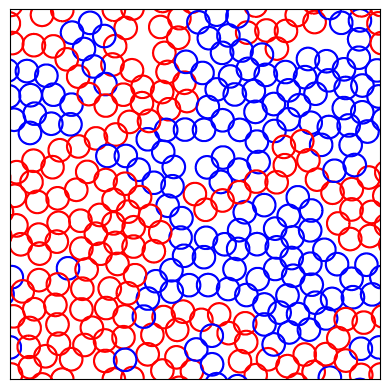

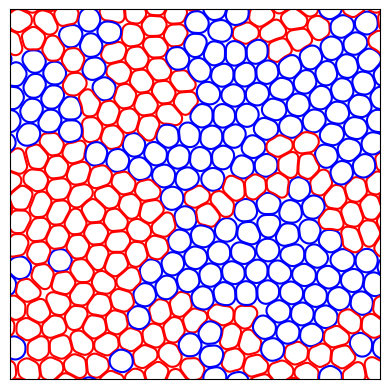

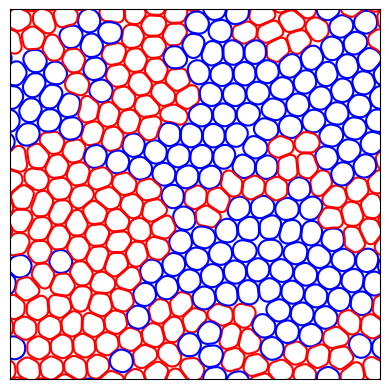

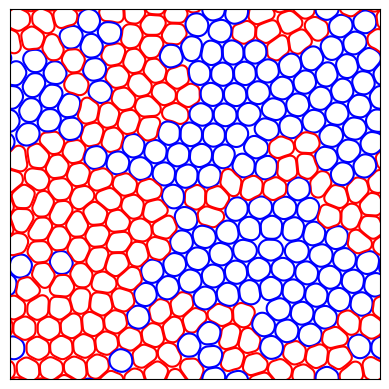

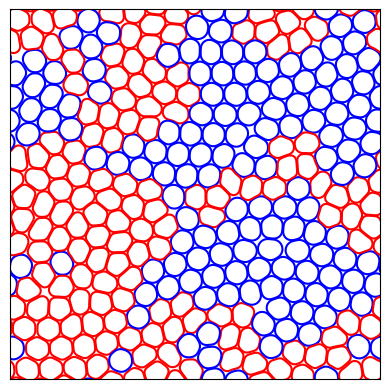

In [69]:
import matplotlib.pyplot as plt
import os
import re
import numpy as np
from collections import defaultdict


def plot_cells(directory):
    with open(os.path.join(directory, "configuration.in"), "r") as file:
        config_lines = file.readlines()
    config_data = {
        line.split(":")[0].strip(): line.split(":")[1].strip()
        for line in config_lines
        if ":" in line
    }

    width_values_str = config_data["WIDTH"].replace("{", "").replace("}", "").split()
    width_values = [float(value) for value in width_values_str]

    model_name = config_data["MODEL"].split()[0]
    model_params = re.findall(r"\[\d+\]=(\S+)", config_data["MODEL"])
    model_params = [float(param) for param in model_params]

    model_numbers = re.findall(r"(\d+)", config_data["MODEL"].split("!")[1])
    model_numbers = [int(param) for param in model_numbers]

    model_data = {
        "name": model_name,
        "params": {key: model_params[coefficients[key]] for key in coefficients},
        "numbers": {
            "cancer": model_numbers[0],
            "normal": model_numbers[1],
        },
        "width": width_values,
    }
    print(model_data)

    # Group filenames by time step
    filenames_by_time = defaultdict(list)
    for filename in os.listdir(directory):
        match = re.match(r"data(\d+)_(\d+)", filename)
        if match:
            data_id, time_step = map(int, match.groups())
            filenames_by_time[time_step].append((data_id, filename))

    # Sort the keys of filenames_by_time
    time_steps = sorted(filenames_by_time.keys())
    colors = lambda i: "blue" if i >= model_data["numbers"]["cancer"] else "red"

    # Create a plot for each time step
    for time_step in time_steps:
        plt.figure()
        for data_id, filename in filenames_by_time[time_step]:
            with open(os.path.join(directory, filename), "r") as file:
                metadata = file.readline().split()
                domain_x_start, domain_x_end = map(float, metadata[3:5])
                domain_y_start, domain_y_end = map(float, metadata[5:7])
                region_x_start, region_x_end = map(float, metadata[9:11])
                region_y_start, region_y_end = map(float, metadata[11:13])

                cell_values = []

                for line in file:
                    cell_values.append(list(map(float, line.split())))

                cell_values = np.array(cell_values)

                plt.xlim(domain_x_start, domain_x_end)
                plt.ylim(domain_y_start, domain_y_end)
                plt.contour(
                    cell_values,
                    levels=[0.5],
                    extent=[region_x_start, region_x_end, region_y_start, region_y_end],
                    colors=colors(data_id),
                )

                if region_x_end >= domain_x_end:
                    plt.contour(
                        cell_values,
                        levels=[0.5],
                        extent=[
                            region_x_start - domain_x_end,
                            region_x_end - domain_x_end,
                            region_y_start,
                            region_y_end,
                        ],
                        colors=colors(data_id),
                    )
                if region_y_end >= domain_y_end:
                    plt.contour(
                        cell_values,
                        levels=[0.5],
                        extent=[
                            region_x_start,
                            region_x_end,
                            region_y_start - domain_y_end,
                            region_y_end - domain_y_end,
                        ],
                        colors=colors(data_id),
                    )
                if region_x_end >= domain_x_end and region_y_end >= domain_y_end:
                    plt.contour(
                        cell_values,
                        levels=[0.5],
                        extent=[
                            region_x_start - domain_x_end,
                            region_x_end - domain_x_end,
                            region_y_start - domain_y_end,
                            region_y_end - domain_y_end,
                        ],
                        colors=colors(data_id),
                    )

        plt.scatter([], [], color="red", label="Cancer")
        plt.scatter([], [], color="blue", label="Normal")
        # plt.legend()
        # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.title(f"Time step: {time_step}")

        plt.gca().set_aspect('equal')
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])
        plt.gca().xaxis.set_tick_params(width=0)
        plt.gca().yaxis.set_tick_params(width=0)


        plt.title("")
        plt.show()


directory = root_path / folder_time_2 / checkpoint_folder_name
print(directory.resolve())
plot_cells(directory)

In [8]:
import os
import re


def parse_filename(filename):
    match = re.search(r"data(\d+)_(\d+)", filename)
    if match:
        return int(match.group(1)), int(match.group(2))


def parse_first_line(line):
    parts = line.split()
    return (
        float(parts[3]),
        float(parts[4]),
        float(parts[5]),
        float(parts[6]),
        float(parts[9]),
        float(parts[10]),
        float(parts[11]),
        float(parts[12]),
    )


def compute_cell_centers(directory):

    domain_x_start = None
    domain_x_end = None
    domain_y_start = None
    domain_y_end = None

    cell_centers = {}

    for filename in os.listdir(directory):
        match = re.match(r"data(\d+)_(\d+)", filename)
        if match:
            data_id, time_step = map(int, match.groups())

            with open(os.path.join(directory, filename), "r") as file:
                metadata = file.readline().split()
                x_units, y_units = map(float, metadata[1:3])
                domain_x_start, domain_x_end = map(float, metadata[3:5])
                domain_y_start, domain_y_end = map(float, metadata[5:7])
                region_x_start, region_x_end = map(float, metadata[9:11])
                region_y_start, region_y_end = map(float, metadata[11:13])

                x_width = (domain_x_end - domain_x_start) / x_units
                y_width = (domain_y_end - domain_y_start) / y_units

                total_mass = 0
                weighted_x = 0
                weighted_y = 0

                for i, line in enumerate(file):
                    for j, cell_value in enumerate(map(float, line.split())):
                        cell_mass = cell_value
                        cell_x = region_x_start + j * x_width
                        cell_y = region_y_start + i * y_width

                        total_mass += cell_mass
                        weighted_x += cell_x * cell_mass
                        weighted_y += cell_y * cell_mass

                center_of_mass_x = weighted_x / total_mass
                center_of_mass_y = weighted_y / total_mass

                cell_centers[(data_id, time_step)] = (
                    center_of_mass_x,
                    center_of_mass_y,
                )

    return (
        domain_x_start,
        domain_x_end,
        domain_y_start,
        domain_y_end,
    ), cell_centers


directory = root_path / folder_time_2 / checkpoint_folder_name
print(directory.resolve())
domain, cell_centers = compute_cell_centers(directory)

(
    domain_x_start,
    domain_x_end,
    domain_y_start,
    domain_y_end,
) = domain


E:\Dropbox\research\papers\cellular_migration\data\equilibration\2024.04.07.19.06.15\checkpoint
{(0, 0): (799.9568750000005, 799.9568749999944), (0, 1200000): (801.768635164121, 785.9732394195062), (0, 1600000): (803.4605150164512, 786.6417926416342), (0, 400000): (808.3556175578364, 788.0758694262282), (0, 800000): (802.9539467277822, 786.2889226105715), (100, 0): (490.8730710875953, 180.46063259447322), (100, 1200000): (519.0327434019566, 172.76819686756735), (100, 1600000): (518.2330416707993, 173.41497081158505), (100, 400000): (522.3164047589077, 170.1461091562435), (100, 800000): (520.7716775951752, 171.47515549903721), (101, 0): (410.9421900881646, 166.64359487710303), (101, 1200000): (417.5627766729898, 155.4158183630342), (101, 1600000): (417.3787856226176, 155.72359439429047), (101, 400000): (418.30837671258354, 150.32965582162518), (101, 800000): (419.55505623962887, 152.84274545433115), (102, 0): (412.35657160032065, 77.93711711862136), (102, 1200000): (377.69746722576804, 

In [57]:
import numpy as np

R = 49
R_0 = R * 2.5  # Set this to the value of R_0

def sixfold_order_parameter(cell_centers, id, time_step):
    neighbors = [coord for (other_id, other_time_step), coord in cell_centers.items()
                 if other_time_step == time_step and np.linalg.norm(np.array(coord) - np.array(cell_centers[(id, time_step)])) < R_0]
    theta = [np.arctan2(coord[1] - cell_centers[(id, time_step)][1], coord[0] - cell_centers[(id, time_step)][0]) for coord in neighbors]
    phi_6 = np.sum(np.exp(6j * np.array(theta)))
    return phi_6

def sixfold_correlation(cell_centers, time_step):
    phi_6 = [sixfold_order_parameter(cell_centers, id, time_step) for id, _ in cell_centers.keys() if _ == time_step]
    g_6 = np.mean(np.array(phi_6) * np.conj(np.array(phi_6)))
    return g_6

g_6 = sixfold_correlation(cell_centers, 1600000)
print(g_6)

# print(f"g_6 = {g_6}")
# plt.loglog(radii, g_6)
# plt.xlabel('Radius')
# plt.ylabel('Sixfold bond correlation')
# plt.show()

(25.50781803718158+0j)


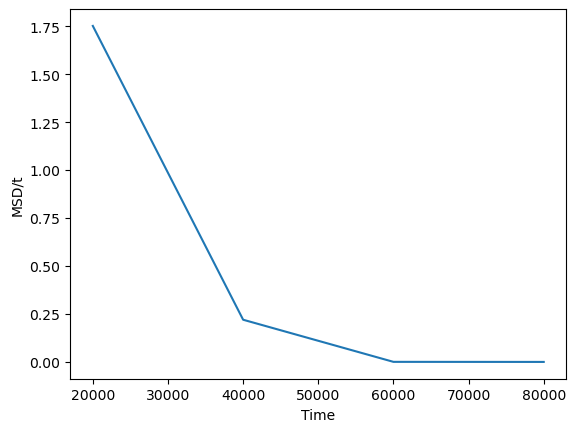

In [46]:
dt = 0.05

def compute_msd(cell_centers):
    msd = []
    time_steps = sorted(set(time for _, time in cell_centers.keys()))
    for i in range(1, len(time_steps)):
        displacements = []
        for id in set(id for id, _ in cell_centers.keys()):
            if (id, time_steps[i - 1]) in cell_centers and (id, time_steps[i]) in cell_centers:
                x1, y1 = cell_centers[(id, time_steps[i - 1])]
                x2, y2 = cell_centers[(id, time_steps[i])]
                displacement = (x2 - x1) ** 2 + (y2 - y1) ** 2
                displacements.append(displacement)
        if displacements:  # Avoid division by zero
            msd.append(sum(displacements) / len(displacements) / (time_steps[i] * dt))
    return msd, [time * dt for time in time_steps[1:]]

msd, time_steps = compute_msd(cell_centers)

# Plot MSD/t with respect to t
plt.plot(time_steps, msd)
plt.xlabel('Time')
plt.ylabel('MSD/t')
plt.show()

In [ ]:
from scipy.stats import linregress

msd, time_steps = compute_msd(cell_centers)

slope, _, _, _, _ = linregress(time_steps, msd)

# The slope of the MSD vs time data is the effective diffusion constant
diffusion_constant = slope / 4

print(f"The effective diffusion constant is {diffusion_constant}")

In [10]:
import matplotlib.pyplot as plt
import imageio
import collections


def create_movie(cell_centers: dict, output_filename):
    # Group cell centers by time step
    cell_centers_by_time = collections.defaultdict(list)
    for (id, time), center in cell_centers.items():
        wrapped_center = (
            (center[0] - domain_x_start) % (domain_x_end - domain_x_start)
            + domain_x_start,
            (center[1] - domain_y_start) % (domain_y_end - domain_y_start)
            + domain_y_start,
        )
        cell_centers_by_time[time].append(wrapped_center)

    # Sort the keys of cell_centers_by_time
    time_steps = sorted(cell_centers_by_time.keys())

    # Create a directory to store the frames
    os.makedirs("frames", exist_ok=True)

    # Create a plot for each time step
    filenames = []
    for i, time in enumerate(time_steps):
        plt.figure()
        for center in cell_centers_by_time[time]:
            plt.scatter(*center)
        plt.xlim(domain_x_start, domain_x_end)  # Adjust as needed
        plt.ylim(domain_y_start, domain_y_end)  # Adjust as needed
        plt.title(f"Time step: {time}")
        filename = f"frames/frame_{i}.png"
        plt.savefig(filename)
        filenames.append(filename)
        plt.close()

    # Create a movie from the frames
    with imageio.get_writer(output_filename, mode="I", fps=2) as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

    # Remove the frames directory
    for filename in filenames:
        os.remove(filename)
    os.rmdir("frames")


# Use the function
create_movie(cell_centers, "cell_centers.mp4")

C:\Users\Zirconix\AppData\Local\Temp\ipykernel_35368\472140068.py:41: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
